TASK 01

Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

In [199]:
import pandas as pd
import numpy as ny

In [200]:
df = pd.read_csv(r'C:\Users\riddh\Downloads\train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [203]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [204]:
correlations = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print(correlations)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [226]:
df[['Id', 'FullBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr','BsmtHalfBath', 'HalfBath','GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd','MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF','3SsnPorch','LotArea', 'PoolArea', 'SalePrice']]


,Id,FullBath,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,BsmtHalfBath,HalfBath,GrLivArea,GarageArea,TotalBsmtSF,...,MasVnrArea,BsmtFinSF1,BsmtFinSF2,WoodDeckSF,2ndFlrSF,OpenPorchSF,3SsnPorch,LotArea,PoolArea,SalePrice
0,1,2,1,150,3,0,1,1710,548,856,...,196.0,706,0,0,854,61,0,8450,0,208500
1,2,2,0,284,3,1,0,1262,460,1262,...,0.0,978,0,298,0,0,0,9600,0,181500
2,3,2,1,434,3,0,1,1786,608,920,...,162.0,486,0,0,866,42,0,11250,0,223500
3,4,1,1,540,3,0,0,1717,642,756,...,0.0,216,0,0,756,35,0,9550,0,140000
4,5,2,1,490,4,0,1,2198,836,1145,...,350.0,655,0,192,1053,84,0,14260,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,2,0,953,3,0,1,1647,460,953,...,0.0,0,0,0,694,40,0,7917,0,175000
1456,1457,2,1,589,3,0,0,2073,500,1542,...,119.0,790,163,349,0,0,0,13175,0,210000
1457,1458,2,0,877,4,0,0,2340,252,1152,...,0.0,275,0,0,1152,60,0,9042,0,266500
1458,1459,1,1,0,2,0,0,1078,240,1078,...,0.0,49,1029,366,0,0,0,9717,0,142125


In [227]:
x = df[['FullBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr','BsmtHalfBath', 'HalfBath','GrLivArea',
        'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd','MasVnrArea', 'BsmtFinSF1','BsmtFinSF2',
        'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF','3SsnPorch','LotArea', 'PoolArea']]
x = x.dropna()
y = df.loc[x.index, 'SalePrice']

In [228]:
x

,FullBath,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,BsmtHalfBath,HalfBath,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,WoodDeckSF,2ndFlrSF,OpenPorchSF,3SsnPorch,LotArea,PoolArea
0,2,1,150,3,0,1,1710,548,856,856,8,196.0,706,0,0,854,61,0,8450,0
1,2,0,284,3,1,0,1262,460,1262,1262,6,0.0,978,0,298,0,0,0,9600,0
2,2,1,434,3,0,1,1786,608,920,920,6,162.0,486,0,0,866,42,0,11250,0
3,1,1,540,3,0,0,1717,642,756,961,7,0.0,216,0,0,756,35,0,9550,0
4,2,1,490,4,0,1,2198,836,1145,1145,9,350.0,655,0,192,1053,84,0,14260,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,0,953,3,0,1,1647,460,953,953,7,0.0,0,0,0,694,40,0,7917,0
1456,2,1,589,3,0,0,2073,500,1542,2073,7,119.0,790,163,349,0,0,0,13175,0
1457,2,0,877,4,0,0,2340,252,1152,1188,9,0.0,275,0,0,1152,60,0,9042,0
1458,1,1,0,2,0,0,1078,240,1078,1078,5,0.0,49,1029,366,0,0,0,9717,0


In [229]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1452, dtype: int64

In [230]:
y.dtype

dtype('int64')

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [232]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [233]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [234]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [235]:
y_pred = model.predict(x_test_scaled)

In [236]:
y_pred

array([234004.96765522, 221706.51276206, 199373.01518103, 276203.75141888,
       145329.88117136, 242990.86268255, 250565.48553033, 119355.7325146 ,
        75791.23741626,  79479.92508786, 190641.23871457, 168448.75497316,
       151902.95986882, 157276.30469537, 199120.54374813, 160414.20870764,
        77532.96558045, 136153.13186108, 188698.90615642, 186509.5812608 ,
       226441.5638169 , 291839.08158395, 242465.56247035, 153962.82986014,
       193158.5756459 , 239237.56351585, 181320.48161851,  86934.83351683,
        93683.00891946, 271168.56731103, 123307.31754775, 206706.61732355,
       346100.64827343, 179515.13768438, 105171.54425424, 217673.03712096,
       104593.72899536, 265955.37365879, 198625.19785248, 182780.33064814,
       204660.18568279, 159328.02981837, 177225.67522477, 277889.38199783,
        53145.39058715, 303924.83306385, 212998.58245196, 115915.14399753,
       165410.10481512, 176001.21059131, 108454.78279714, 203588.30973155,
       155343.61519086, 2

In [237]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))

Coefficients: [ 13977.28668834   7474.47058023   4762.90008863 -13703.13003273
   1643.25506757   5588.98620312   4189.76233835  14585.51460398
  10901.87693884  15734.03230483   6460.38251062   8877.0920776
   6184.50395161   -926.03758539   5533.24251067  19070.08141815
    479.34191856   1456.25933247   2639.78584771  -1714.5174693 ]
Intercept: 180811.17484926787
R^2 Score: 0.7682074111228956
Root Mean Squared Error (RMSE): 37622.289653593885


C:\Users\riddh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [239]:
ff=y_test
ff

1042    196000
1130    135000
1003    136905
1324    147000
531     128000
         ...  
897     142953
1334    125000
1416    122500
718     341000
255     230000
Name: SalePrice, Length: 291, dtype: int64

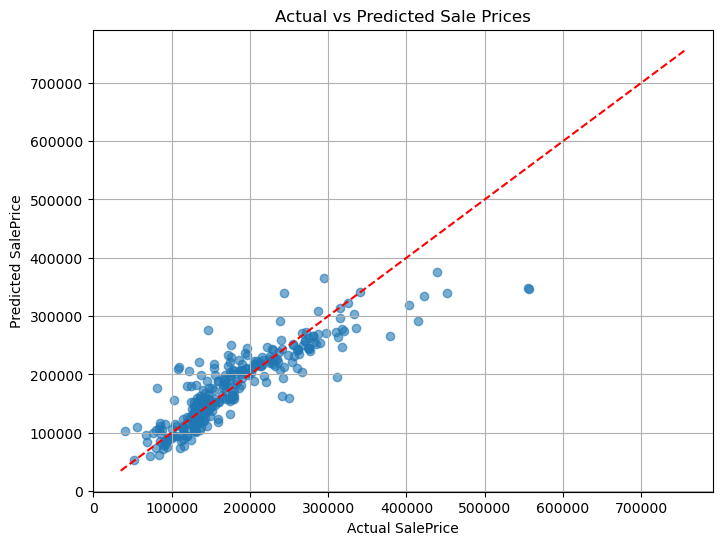

In [240]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(ff, y_pred, alpha=0.6)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted Sale Prices')
plt.plot([y_test_final.min(), y_test_final.max()], [y_test_final.min(), y_test_final.max()], 'r--')
plt.grid(True)
plt.show()


In [268]:
test_df = pd.read_csv(r'C:\Users\riddh\Downloads\test.csv')

In [269]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [270]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [282]:
features = ['FullBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr',
            'BsmtHalfBath', 'HalfBath', 'GrLivArea', 'GarageArea',
            'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'MasVnrArea',
            'BsmtFinSF1','BsmtFinSF2','WoodDeckSF', '2ndFlrSF', 'OpenPorchSF',
            '3SsnPorch','LotArea','PoolArea']

In [297]:
test_data = pd.read_csv(r'C:\Users\riddh\Downloads\test.csv')
X_test = test_data[features].copy()
X_test

,FullBath,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,BsmtHalfBath,HalfBath,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,WoodDeckSF,2ndFlrSF,OpenPorchSF,3SsnPorch,LotArea,PoolArea
0,1,0.0,270.0,2,0.0,0,896,730.0,882.0,896,5,0.0,468.0,144.0,140,0,0,0,11622,0
1,1,0.0,406.0,3,0.0,1,1329,312.0,1329.0,1329,6,108.0,923.0,0.0,393,0,36,0,14267,0
2,2,0.0,137.0,3,0.0,1,1629,482.0,928.0,928,6,0.0,791.0,0.0,212,701,34,0,13830,0
3,2,0.0,324.0,3,0.0,1,1604,470.0,926.0,926,7,20.0,602.0,0.0,360,678,36,0,9978,0
4,2,0.0,1017.0,2,0.0,0,1280,506.0,1280.0,1280,5,0.0,263.0,0.0,0,0,82,0,5005,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1,0.0,546.0,3,0.0,1,1092,0.0,546.0,546,5,0.0,0.0,0.0,0,546,0,0,1936,0
1455,1,0.0,294.0,3,0.0,1,1092,286.0,546.0,546,6,0.0,252.0,0.0,0,546,24,0,1894,0
1456,1,1.0,0.0,4,0.0,0,1224,576.0,1224.0,1224,7,0.0,1224.0,0.0,474,0,0,0,20000,0
1457,1,0.0,575.0,3,1.0,0,970,0.0,912.0,970,6,0.0,337.0,0.0,80,0,32,0,10441,0


In [284]:
X_test = X_test.fillna(0)

In [285]:
X_test_scaled = scaler.transform(X_test)


In [296]:
pred = model.predict(X_test_scaled)

array([139601.05544184, 167350.3705986 , 193047.08798505, ...,
       167305.04382142,  88010.22095704, 240423.79931869])

In [298]:
test_data['PredictedSalePrice'] = pred
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PredictedSalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,139601.055442
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,167350.370599
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,193047.087985
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,200919.908540
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,177194.861723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,76188.934281
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,100523.726385
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,167305.043821
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,88010.220957


In [299]:
test_data[['Id','PredictedSalePrice']]

,Id,PredictedSalePrice
0,1461,139601.055442
1,1462,167350.370599
2,1463,193047.087985
3,1464,200919.908540
4,1465,177194.861723
...,...,...
1454,2915,76188.934281
1455,2916,100523.726385
1456,2917,167305.043821
1457,2918,88010.220957
